<a href="https://colab.research.google.com/github/heejvely/python-practice/blob/main/ml_%ED%9A%8C%EA%B7%80%ED%8F%89%EA%B0%80ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 회귀
* 소득이 증가하면 소비도 증가. 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있음.
* 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 Simple Linear Regression이라고 함. 지도학습
* 변수 X와 Y에 대한 정보를 가지고 일차 방정식의 계수 a, b를 찾는 과정이 단순회귀분석 알고리즘

In [1]:
# 모듈 import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('/content/drive/MyDrive/빅분기연습/dataset/auto-mpg.xlsx')
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [3]:
import warnings
warnings.filterwarnings('ignore')

# 이상치 nan 값으로 변경
ndf['horsepower'] = ndf.horsepower.replace('?',np.nan)

# nan값 제거
ndf.dropna(subset=['horsepower'],axis=0, inplace=True)

# ndf  정보 확인
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


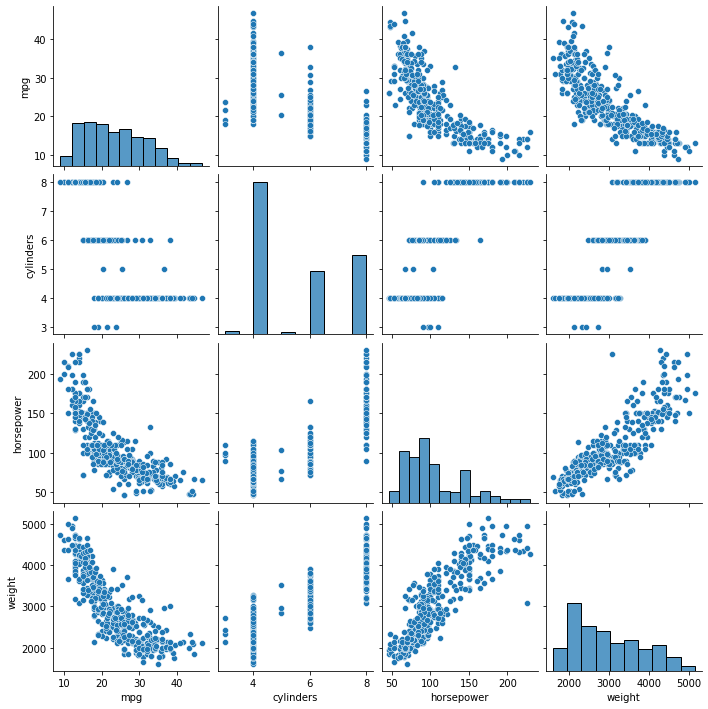

In [4]:
sns.pairplot(ndf)

In [6]:
# 변수(속성) 선택
X = ndf[['weight']] # 독립변수
y = ndf['mpg'] # 종속변수

from sklearn.model_selection import train_test_split

# train, test set 분리, 7:3, random_state 0으로 고정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
from sklearn.linear_model import LinearRegression

# 회귀모델 linearregression 사용 -> 객체지정
lr = LinearRegression()

# 학습
lr.fit(X_train, y_train)

# 예측값 생성
y_preds = lr.predict(X_test)

# 예측값 샘플 출력
y_preds[:5]

array([29.87615997, 23.98012273, 11.91058769, 29.87615997, 29.7220152 ])

### 회귀 평가 지표
* MAE: 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
* MSE: 실제값과 예측값의 차이를 제곱해 평균한 것
* RMSE: MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것 보정)
* R square: 분산 기반으로 예측 성능을 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표로 함.
* r2 score는 0과 1사이의 값을 가지며 1에 가까울수록 선형회귀 모델이 데이터에 대하여 높은 연관성을 가지고 있다고 해석할 수 있다.


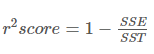


In [9]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)
print(f'MSE:{mse:.3f}, RMSE:{rmse:.3f}, R2 score:{r2:.3f}')

MSE:20.642, RMSE:4.543, R2 score:0.664


In [10]:
print('기울기 a:', lr.coef_)
print('절편 b:', lr.intercept_)

기울기 a: [-0.00770724]
절편 b: 46.254041172147396


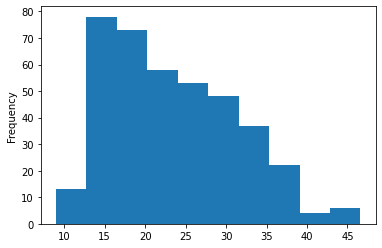

In [11]:
y.plot(kind='hist')

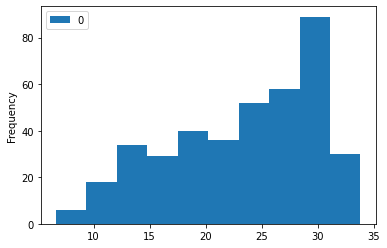

In [12]:
y_hat = lr.predict(X)
pd.DataFrame(y_hat).plot(kind='hist')

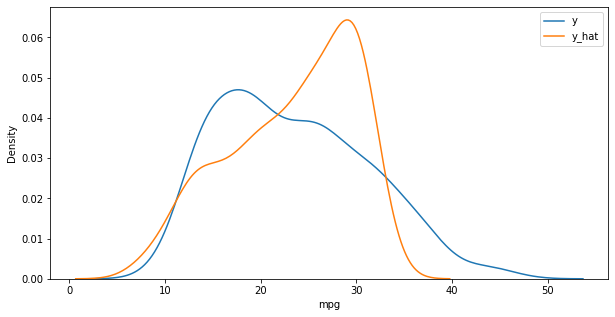

In [15]:
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y, hist=False, label='y')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat')
plt.legend()

## 다중 회귀분석
* 여러 개의 독립 변수가 종속 변수에 영향을 주고 선형 관계를 갖는 경우에 다중회귀분석을 사용
* 다중 회귀분석 알고리즘은 각 독립 변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성. 지도학습

In [16]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 25.3 KB


In [17]:
X = ndf[['cylinders','horsepower','weight']]
y = ndf['mpg']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
r2 = r2_score(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f'MSE:{mse:.3f}, RMSE:{rmse:.3f}, R2 score:{r2:.3f}')

MSE:19.674, RMSE:4.436, R2 score:0.680


In [18]:
print('X변수의 계수:',lr.coef_)
print('절편:', lr.intercept_)

X변수의 계수: [-0.57598375 -0.03393439 -0.00537578]
절편: 45.990886941077676


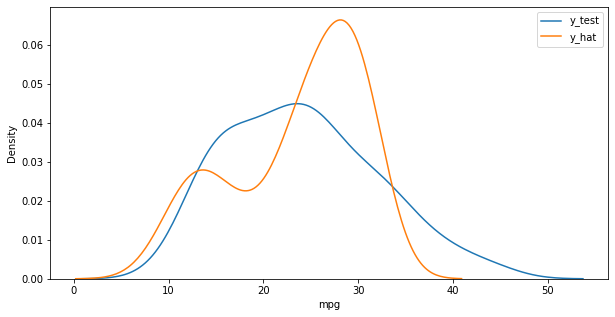

In [19]:
y_hat = lr.predict(X_test)

plt.figure(figsize=(10,5))
ax1 = sns.distplot(y_test, hist=False, label='y_test')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat')
plt.legend()

In [20]:
# minmaxscaler로 변환
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

ndf_ms = scaler.fit_transform(ndf)
ndf_ms_df = pd.DataFrame(data=ndf_ms, columns=ndf.columns)
ndf_ms_df.head()

,mpg,cylinders,horsepower,weight
0,0.239362,1.0,0.456522,0.536150
1,0.159574,1.0,0.646739,0.589736
2,0.239362,1.0,0.565217,0.516870
3,0.186170,1.0,0.565217,0.516019
4,0.212766,1.0,0.510870,0.520556


In [22]:
# R-squared 구하기
X = ndf_ms_df[['cylinders','horsepower','weight']]
y = ndf_ms_df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
r2 = lr.score(X_test, y_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f'MSE:{mse:.3f}, RMSE:{rmse:.3f}, R2 score:{r2:.3f}')

MSE:579.779, RMSE:24.079, R2 score:0.680


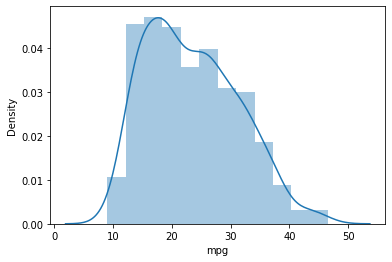

In [23]:
sns.distplot(ndf.mpg)

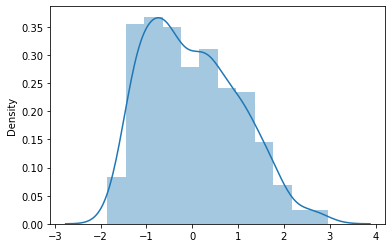

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(ndf[['mpg']])
scaled_data_df = pd.DataFrame(data=scaled_data)

sns.distplot(scaled_data_df)

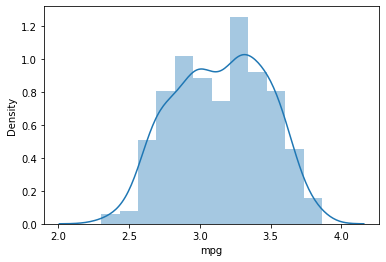

In [26]:
# 로그 취할 시 조금 더 정규 분포에 가깝게 됨.
log_mpg = np.log1p(ndf['mpg'])
sns.distplot(log_mpg)

[-0.09398496  1.97368421 -1.73684211]
          2
-0.09398 x + 1.974 x - 1.737


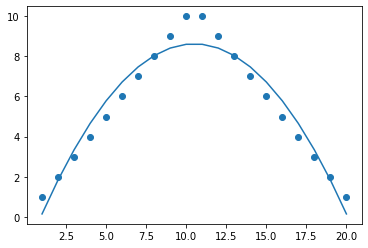

In [27]:
import numpy as np
import matplotlib.pyplot as plt

x = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,18, 19, 20]
y = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,10,  9,  8,  7,  6,  5,  4,  3,  2,  1]

curve = np.polyfit(x,y,2)
poly = np.poly1d(curve)
print(curve)
print(poly)

new_x = []
new_y = []

for i in range(20):
  new_x.append(i+1)
  calc = poly(i+1)
  new_y.append(calc)
plt.scatter(x,y)
plt.plot(new_x, new_y)